In [17]:
import os
if 'Conformal-Sparsemax/notebooks' in os.getcwd():
    os.chdir(os.path.dirname(os.getcwd()))

In [18]:
import pickle
from conformal_sparsemax.classifier.datasets import CIFAR10, CIFAR100, MNIST
import matplotlib.pyplot as plt
import torchvision
import numpy as np

In [25]:
loss = 'FYLoss' #FYLoss or NLLLoss
transformation = 'softmax' #sparsemax, softmax or entmax15
dataset='CIFAR100' #CIFAR100 or MNIST

In [26]:
with open(f'predictions/{dataset}_cal_{loss}_{transformation}_proba.pickle', 'rb') as f:
    pred_cal = pickle.load(f)
with open(f'predictions/{dataset}_test_{loss}_{transformation}_proba.pickle', 'rb') as f:
    pred_test = pickle.load(f)
with open(f'predictions/{dataset}_cal_true.pickle', 'rb') as f:
    true_cal = pickle.load(f)
with open(f'predictions/{dataset}_test_true.pickle', 'rb') as f:
    true_test = pickle.load(f)

In [27]:
data_class = {
    'CIFAR100': CIFAR100,
    'CIFAR10': CIFAR10,
    'MNIST': MNIST,
}

data = data_class[dataset](0.2, 16, 3000, False)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
to_pil = torchvision.transforms.ToPILImage()

In [29]:
str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [44]:
n_cal, n_classes = pred_cal.shape 
n_test = true_test.shape[0]
alpha = 0.1
true_mask = true_cal.astype(bool)
cal_scores = 1 - pred_cal[true_mask]
q_level = np.ceil((n_cal+1)*(1-alpha))/n_cal
qhat = np.quantile(cal_scores, q_level, method = 'higher') # check quantile method
test_scores = 1 - pred_test
test_match = test_scores<= qhat

In [109]:
print(np.where(((test_match.sum(axis =1)<5) & \
                (test_match.sum(axis =1)>2) & \
                (sparse_match.sum(axis =1)>1)& \
                (~sparse_match[true_test.astype(bool)])))[0])

[ 927 1369 2286 2931 3164 3218 3582 3791 6846]


In [74]:
transformation = 'sparsemax'
with open(f'predictions/{dataset}_test_{loss}_{transformation}_proba.pickle', 'rb') as f:
    pred_test_sparse = pickle.load(f)

True label: pine_tree
Predicted CP Set: ['maple_tree', 'oak_tree', 'pine_tree', 'willow_tree']
Predicted Sparsemax Set: ['maple_tree', 'oak_tree']


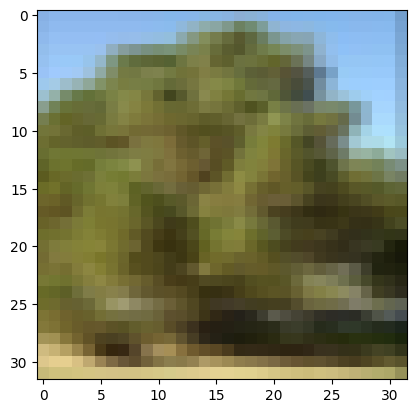

In [110]:
i = 2931
sample = data.test.dataset[i]
print('True label:', str_labels[sample[1]])
pred_set = np.where(test_match[i])[0]
pred_labels = [str_labels[k] for k in pred_set]
pred_sparse_set = np.where(pred_test_sparse[i]>0)[0]
pred_labels_sparse = [str_labels[k] for k in pred_sparse_set]
print('Predicted CP Set:', pred_labels)
print('Predicted Sparsemax Set:', pred_labels_sparse)

plt.imshow(to_pil(sample[0]));

In [81]:
coverage = test_match[true_test.astype(bool)].sum()/n_test
set_size = test_match.sum(axis = 1)
print(coverage,set_size.mean())

0.8979 10.156


In [82]:
sparse_match = pred_test_sparse>0
coverage = sparse_match[true_test.astype(bool)].sum()/n_test
set_size = sparse_match.sum(axis = 1)
print(coverage,set_size.mean())

0.7329 2.379


array([ True, False,  True, ..., False, False, False])